Lab-10: Write a program to estimate pitch of a speech signal.

Pitch Period (To): 2.2675736961451248e-05
Pitch Frequency (Fo): 44100.0


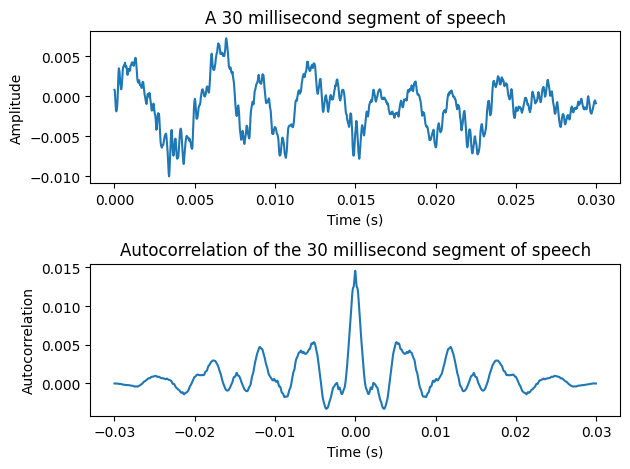

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Read the speech segment from the WAV file using Librosa
y, Fs = librosa.load(r"E:\3.2\Imran Sir\All_Lab (ICE-3208)\All_Lab (ICE-3208)\input\harvard.wav", sr=None)

# Cut a portion of the speech signal (for example, for 30 ms)
start_time = 4.515
end_time = 4.545
y = y[int(start_time * Fs):int(end_time * Fs)]

# Compute autocorrelation
autocorrelation = np.correlate(y, y, mode='full')

# Time axis for autocorrelation plot (in seconds)
kk = np.arange(-len(y) + 1, len(y)) / Fs

# Plot original signal
plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y)) / Fs, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('A 30 millisecond segment of speech')

# Plot autocorrelation
plt.subplot(2, 1, 2)
plt.plot(kk, autocorrelation)
plt.xlabel('Time (s)')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of the 30 millisecond segment of speech')

# Extract relevant part of autocorrelation (21 to 160)
auto = autocorrelation[len(y)-1:len(y)+160]

# Find the maximum value and corresponding sample number
max_idx = np.argmax(auto)
sample_no = max_idx + 1  # Adjust for indexing
pitch_period_To = sample_no * (1 / Fs)
pitch_freq_Fo = 1 / pitch_period_To

print("Pitch Period (To):", pitch_period_To)
print("Pitch Frequency (Fo):", pitch_freq_Fo)

plt.tight_layout()
plt.show()
